**ESERCIZITAZIONE 6:**

E' riportata l'analisi dati della simulazione del modello di Ising 1D, in un ensemble canonico (temperatura costante).

    

**Esercizio 6.1:** Si calcolano l'energia interna, la suscettività, la magnetizzazione e il calore specifico dell'ensemble a differenti temperature, sia con Gibbs che con Metropolis:

Si comincia con l'energia interna per $H = 0$:

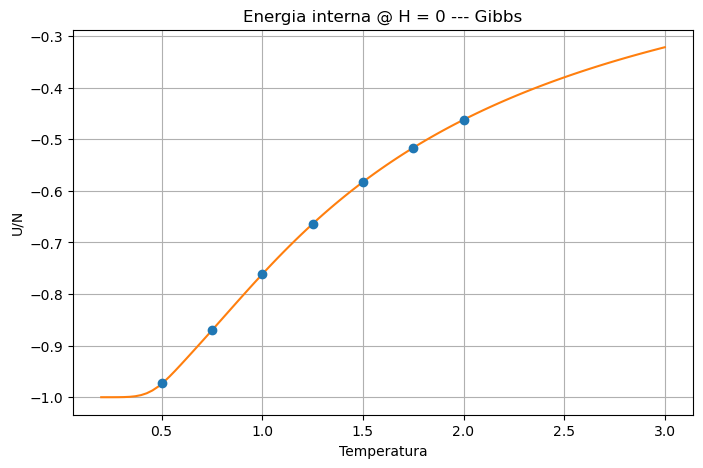

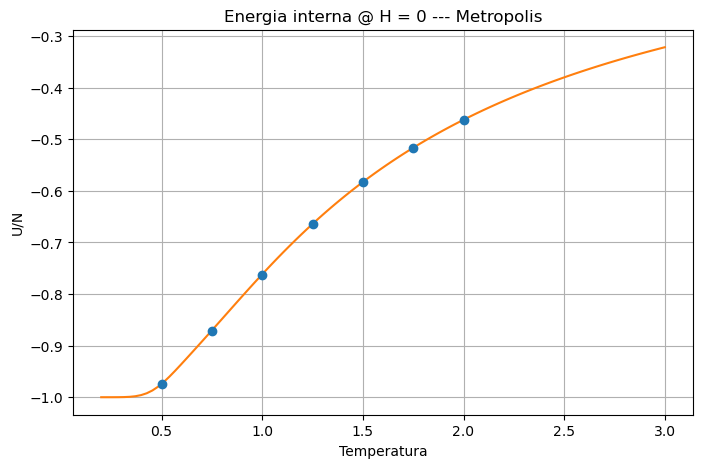

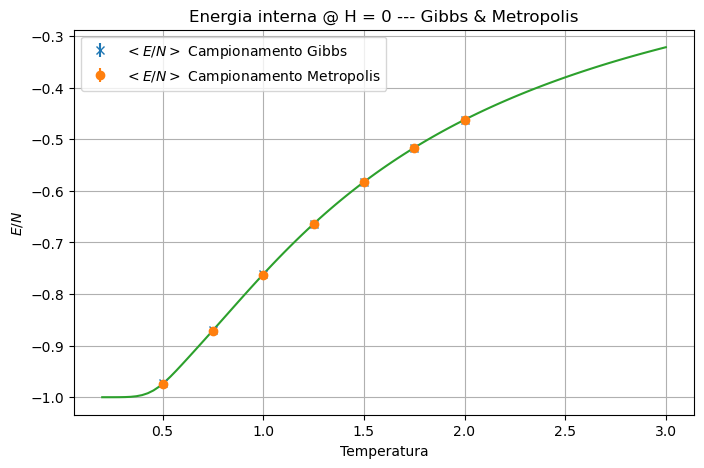

In [1]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Algoritmo di Gibbs
#Lettura file
filename = "Final_measures_Gibbs.txt"
TE_G = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_G['Temp'] = pd.to_numeric(TE_G['Temp'] , errors = 'coerce')
TE_G['Media'] = pd.to_numeric(TE_G['Media'] , errors = 'coerce')
TE_G['Stdev_Media'] = pd.to_numeric(TE_G['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_G = TE_G['Temp']
Media_vector_G = TE_G['Media']
Stdev_Media_vector_G = TE_G['Stdev_Media']

# ---------------- Algoritmo di Metropolis
#Lettura file
filename = "Final_measures_Metro.txt"
TE_M = pd.read_table(filename, delimiter = "\t" , usecols=(0,1,2) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_M['Temp'] = pd.to_numeric(TE_M['Temp'] , errors = 'coerce')
TE_M['Media'] = pd.to_numeric(TE_M['Media'] , errors = 'coerce')
TE_M['Stdev_Media'] = pd.to_numeric(TE_M['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_M = TE_M['Temp']
Media_vector_M = TE_M['Media']
Stdev_Media_vector_M = TE_M['Stdev_Media']

# ---------------- preparare il grafico della soluzione analitica
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

#disegnare grafico dei valori con barre d'errore (deviazione standard della media)
fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('U/N')
plt.grid(True)
plt.plot(T,e)
plt.title("Energia interna @ H = 0 --- Gibbs")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('U/N')
plt.grid(True)
plt.plot(T,e)
plt.title("Energia interna @ H = 0 --- Metropolis")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='x', label = '$<E/N>$ Campionamento Gibbs')
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o', label = '$<E/N>$ Campionamento Metropolis')
plt.xlabel('Temperatura')
plt.ylabel('$E/N$')
plt.grid(True)
plt.plot(T,e)
plt.legend()
plt.title("Energia interna @ H = 0 --- Gibbs & Metropolis")
plt.show()


Suscettività magnetica per $H = 0$:

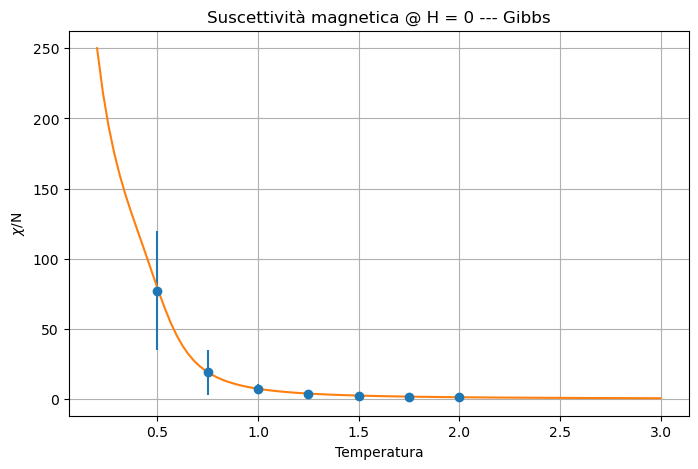

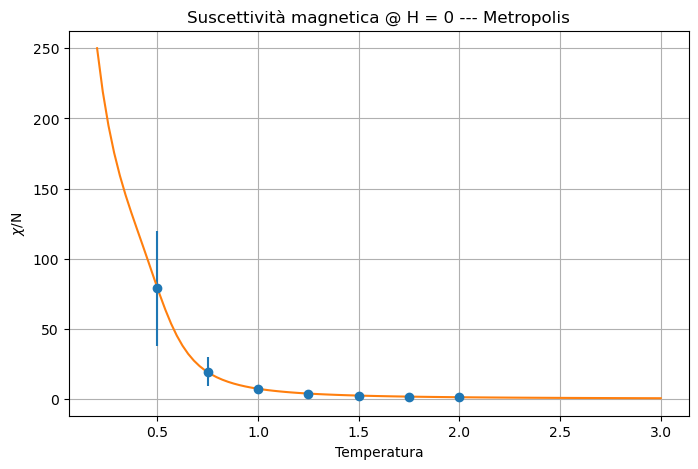

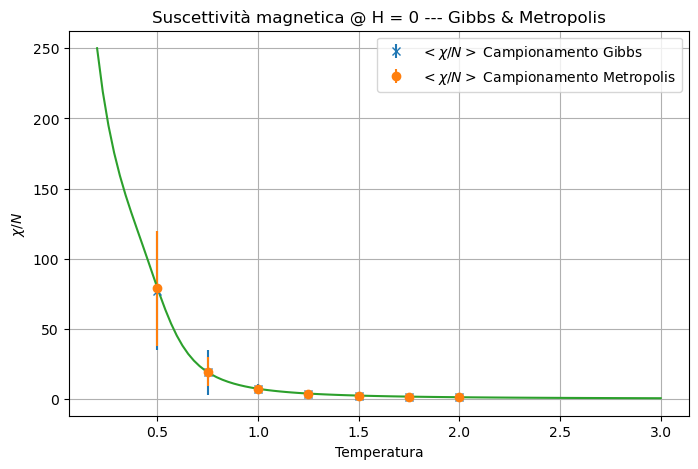

In [2]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Algoritmo di Gibbs
#Lettura file
filename = "Final_measures_Gibbs.txt"
TE_G = pd.read_table(filename, delimiter = "\t" , usecols=(0,3,4) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_G['Temp'] = pd.to_numeric(TE_G['Temp'] , errors = 'coerce')
TE_G['Media'] = pd.to_numeric(TE_G['Media'] , errors = 'coerce')
TE_G['Stdev_Media'] = pd.to_numeric(TE_G['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_G = TE_G['Temp']
Media_vector_G = TE_G['Media']
Stdev_Media_vector_G = TE_G['Stdev_Media']

# ---------------- Algoritmo di Metropolis
#Lettura file
filename = "Final_measures_Metro.txt"
TE_M = pd.read_table(filename, delimiter = "\t" , usecols=(0,3,4) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_M['Temp'] = pd.to_numeric(TE_M['Temp'] , errors = 'coerce')
TE_M['Media'] = pd.to_numeric(TE_M['Media'] , errors = 'coerce')
TE_M['Stdev_Media'] = pd.to_numeric(TE_M['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_M = TE_M['Temp']
Media_vector_M = TE_M['Media']
Stdev_Media_vector_M = TE_M['Stdev_Media']

# ---------------- preparare il grafico della soluzione analitica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

#disegnare grafico dei valori con barre d'errore (deviazione standard della media)
fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('$\chi$/N')
plt.grid(True)
plt.plot(T,X)
plt.title("Suscettività magnetica @ H = 0 --- Gibbs")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('$\chi$/N')
plt.grid(True)
plt.plot(T,X)
plt.title("Suscettività magnetica @ H = 0 --- Metropolis")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='x', label = '$<\chi/N>$ Campionamento Gibbs')
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o', label = '$<\chi/N>$ Campionamento Metropolis')
plt.xlabel('Temperatura')
plt.ylabel('$\chi/N$')
plt.grid(True)
plt.plot(T,X)
plt.legend()
plt.title("Suscettività magnetica @ H = 0 --- Gibbs & Metropolis")
plt.show()


Magnetizzazione per $H = 0$:

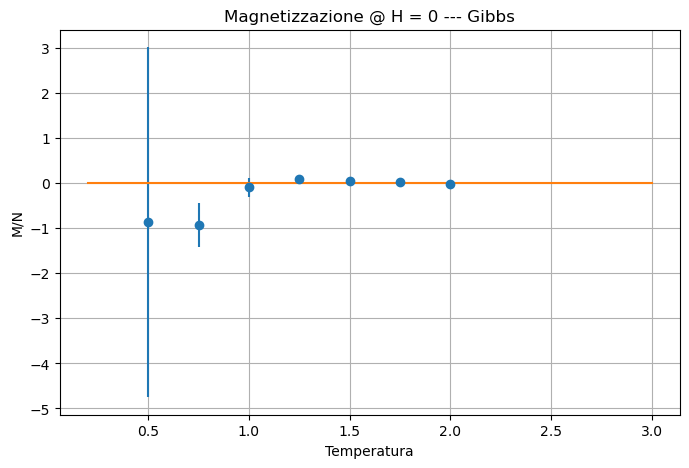

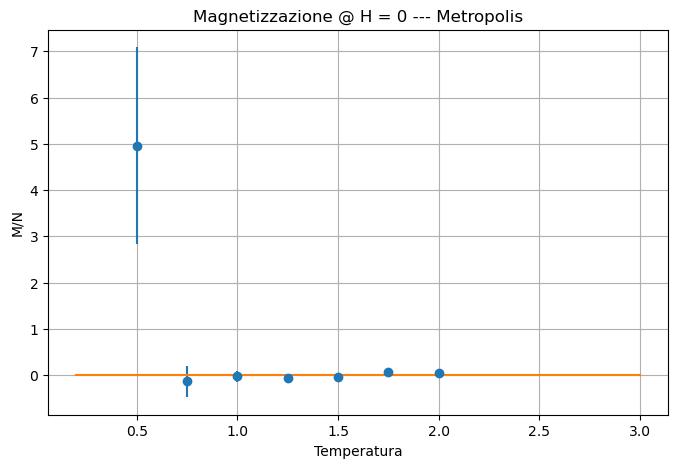

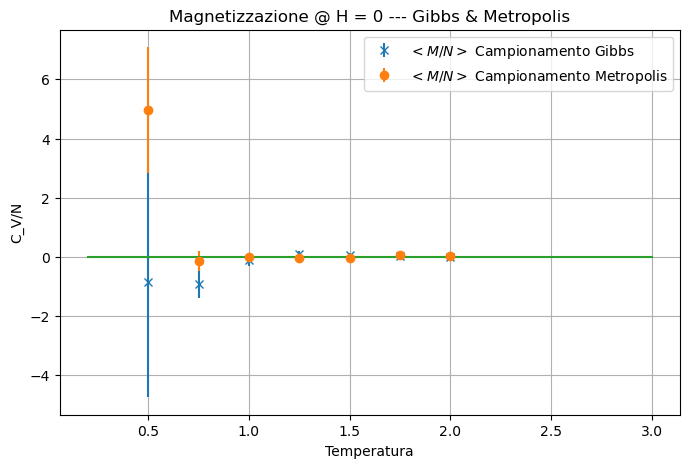

In [3]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Algoritmo di Gibbs
#Lettura file
filename = "Final_measures_Gibbs.txt"
TE_G = pd.read_table(filename, delimiter = "\t" , usecols=(0,5,6) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_G['Temp'] = pd.to_numeric(TE_G['Temp'] , errors = 'coerce')
TE_G['Media'] = pd.to_numeric(TE_G['Media'] , errors = 'coerce')
TE_G['Stdev_Media'] = pd.to_numeric(TE_G['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_G = TE_G['Temp']
Media_vector_G = TE_G['Media']
Stdev_Media_vector_G = TE_G['Stdev_Media']

# ---------------- Algoritmo di Metropolis
#Lettura file
filename = "Final_measures_Metro.txt"
TE_M = pd.read_table(filename, delimiter = "\t" , usecols=(0,5,6) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_M['Temp'] = pd.to_numeric(TE_M['Temp'] , errors = 'coerce')
TE_M['Media'] = pd.to_numeric(TE_M['Media'] , errors = 'coerce')
TE_M['Stdev_Media'] = pd.to_numeric(TE_M['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_M = TE_M['Temp']
Media_vector_M = TE_M['Media']
Stdev_Media_vector_M = TE_M['Stdev_Media']

# ---------------- preparare il grafico della soluzione analitica
X = 0*T

#disegnare grafico dei valori con barre d'errore (deviazione standard della media)
fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('M/N')
plt.grid(True)
plt.plot(T,X)
plt.title("Magnetizzazione @ H = 0 --- Gibbs")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('M/N')
plt.grid(True)
plt.plot(T,X)
plt.title("Magnetizzazione @ H = 0 --- Metropolis")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='x', label = '$<M/N>$ Campionamento Gibbs')
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o', label = '$<M/N>$ Campionamento Metropolis')
plt.xlabel('Temperatura')
plt.ylabel('C_V/N')
plt.grid(True)
plt.plot(T,X)
plt.legend()
plt.title("Magnetizzazione @ H = 0 --- Gibbs & Metropolis")
plt.show()

Calore specifico per $H = 0$:

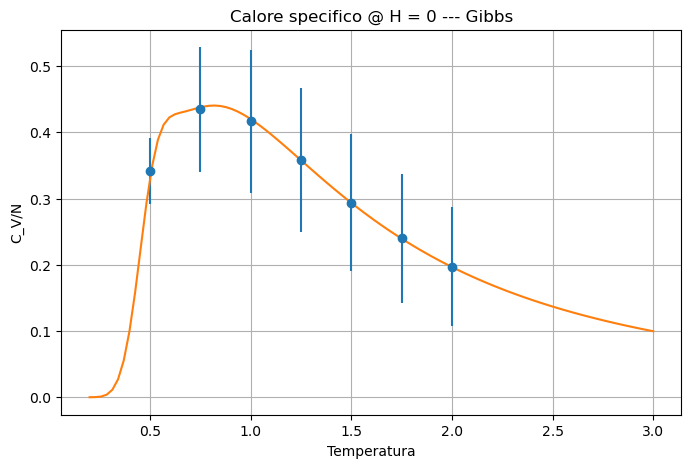

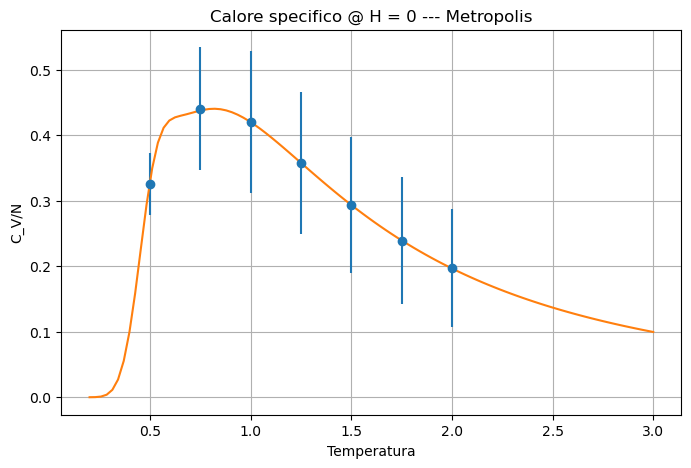

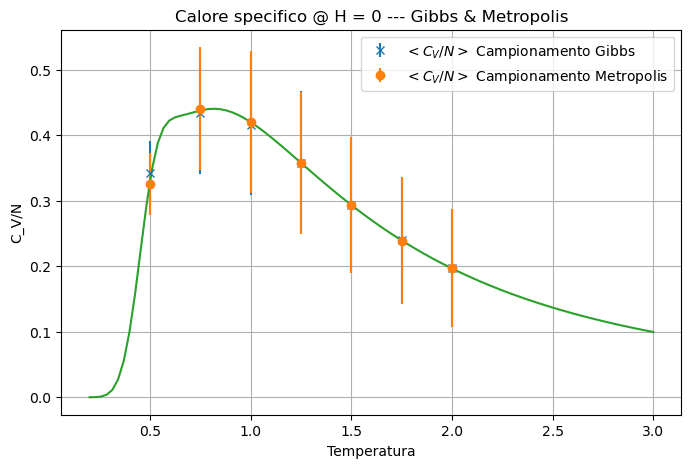

In [4]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Algoritmo di Gibbs
#Lettura file
filename = "Final_measures_Gibbs.txt"
TE_G = pd.read_table(filename, delimiter = "\t" , usecols=(0,7,8) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_G['Temp'] = pd.to_numeric(TE_G['Temp'] , errors = 'coerce')
TE_G['Media'] = pd.to_numeric(TE_G['Media'] , errors = 'coerce')
TE_G['Stdev_Media'] = pd.to_numeric(TE_G['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_G = TE_G['Temp']
Media_vector_G = TE_G['Media']
Stdev_Media_vector_G = TE_G['Stdev_Media']

# ---------------- Algoritmo di Metropolis
#Lettura file
filename = "Final_measures_Metro.txt"
TE_M = pd.read_table(filename, delimiter = "\t" , usecols=(0,7,8) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_M['Temp'] = pd.to_numeric(TE_M['Temp'] , errors = 'coerce')
TE_M['Media'] = pd.to_numeric(TE_M['Media'] , errors = 'coerce')
TE_M['Stdev_Media'] = pd.to_numeric(TE_M['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_M = TE_M['Temp']
Media_vector_M = TE_M['Media']
Stdev_Media_vector_M = TE_M['Stdev_Media']

# ---------------- preparare il grafico della soluzione analitica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

#disegnare grafico dei valori con barre d'errore (deviazione standard della media)
fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('C_V/N')
plt.grid(True)
plt.plot(T,heat)
plt.title("Calore specifico @ H = 0 --- Gibbs")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('C_V/N')
plt.grid(True)
plt.plot(T,heat)
plt.title("Calore specifico @ H = 0 --- Metropolis")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='x', label = '$<C_V/N>$ Campionamento Gibbs')
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o', label = '$<C_V/N>$ Campionamento Metropolis')
plt.xlabel('Temperatura')
plt.ylabel('C_V/N')
plt.grid(True)
plt.plot(T,heat)
plt.legend()
plt.title("Calore specifico @ H = 0 --- Gibbs & Metropolis")
plt.show()

Magnetizzazione a $H = 0.02$:

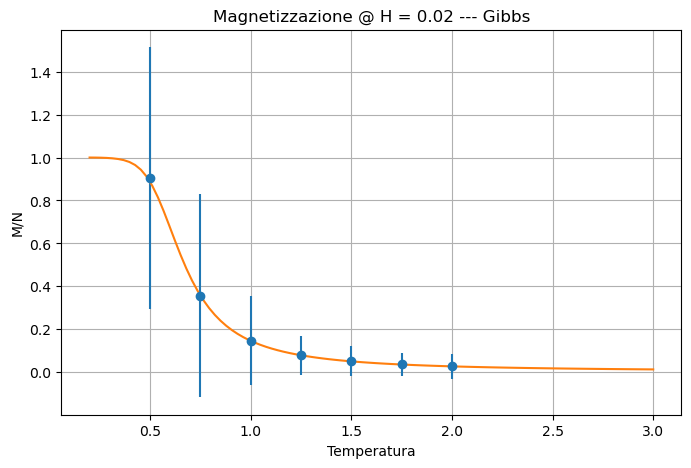

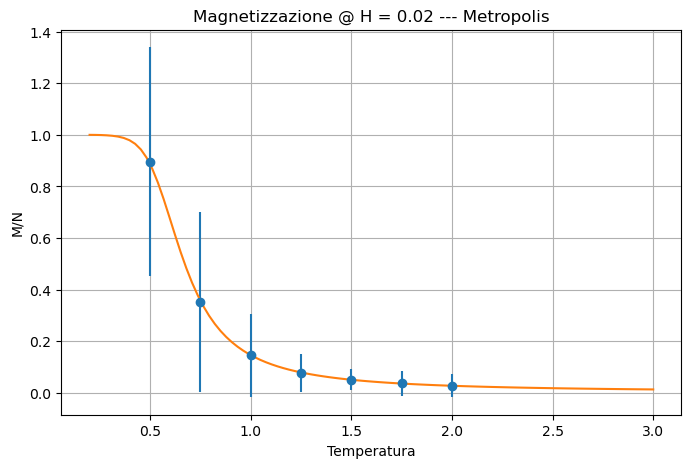

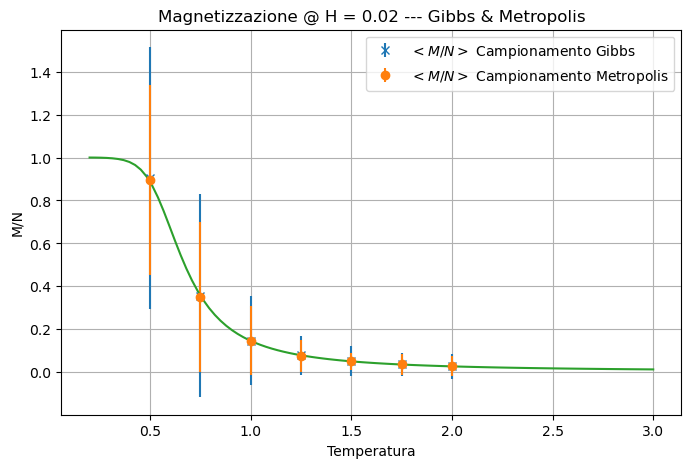

In [5]:
#import asynchat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Algoritmo di Gibbs
#Lettura file
filename = "Final_measures_Gibbs_H.txt"
TE_G = pd.read_table(filename, delimiter = "\t" , usecols=(0,5,6) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_G['Temp'] = pd.to_numeric(TE_G['Temp'] , errors = 'coerce')
TE_G['Media'] = pd.to_numeric(TE_G['Media'] , errors = 'coerce')
TE_G['Stdev_Media'] = pd.to_numeric(TE_G['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_G = TE_G['Temp']
Media_vector_G = TE_G['Media']
Stdev_Media_vector_G = TE_G['Stdev_Media']

# ---------------- Algoritmo di Metropolis
#Lettura file
filename = "Final_measures_Metro_H.txt"
TE_M = pd.read_table(filename, delimiter = "\t" , usecols=(0,5,6) , names = ('Temp','Media' , 'Stdev_Media') )

#estrarre i dati dalle colonne del file di testo
TE_M['Temp'] = pd.to_numeric(TE_M['Temp'] , errors = 'coerce')
TE_M['Media'] = pd.to_numeric(TE_M['Media'] , errors = 'coerce')
TE_M['Stdev_Media'] = pd.to_numeric(TE_M['Stdev_Media'] , errors = 'coerce')

#caricare i dati estratti in rispettivi array
Temp_vector_M = TE_M['Temp']
Media_vector_M = TE_M['Media']
Stdev_Media_vector_M = TE_M['Stdev_Media']

# ---------------- preparare il grafico della soluzione analitica
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

#disegnare grafico dei valori con barre d'errore (deviazione standard della media)
fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('M/N')
plt.grid(True)
plt.plot(T,M)
plt.title("Magnetizzazione @ H = 0.02 --- Gibbs")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o')
plt.xlabel('Temperatura')
plt.ylabel('M/N')
plt.grid(True)
plt.plot(T,M)
plt.title("Magnetizzazione @ H = 0.02 --- Metropolis")
plt.show()

fig = plt.figure(figsize=(8,5))
plt.errorbar(Temp_vector_G, Media_vector_G, yerr = Stdev_Media_vector_G, fmt='x', label = '$<M/N>$ Campionamento Gibbs')
plt.errorbar(Temp_vector_M, Media_vector_M, yerr = Stdev_Media_vector_M, fmt='o', label = '$<M/N>$ Campionamento Metropolis')
plt.xlabel('Temperatura')
plt.ylabel('M/N')
plt.grid(True)
plt.plot(T,M)
plt.legend()
plt.title("Magnetizzazione @ H = 0.02 --- Gibbs & Metropolis")
plt.show()

In conclusione, si osserva, sia nel caso del campionamento con Metropolis che nel caso del campionamento con Gibbs, un accordo tra le simulazioni a diverse temperature e le funzioni analitiche delle grandezze $X(T)$.